In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# Basic EDA using CountVectorizer

In [3]:
df = pd.read_csv('../data/conspiracy_all.csv')

In [4]:
df.head()

,title,num_comments,score,created_utc
0,Apollo conspiracy theorists will tell you this...,180,22,1472376754
1,Media Worried Too Many Americans Will Question...,103,475,1472042001
2,It's official. Julian Assange: Google is direc...,202,3291,1471014496
3,"Major Physics Magazine, Europhysics News, Publ...",107,424,1472513970
4,"Meanwhile on CNN... (Removed from /r/funny, ru...",110,2152,1470263579


In [5]:
# convert epoch to datetime
df.created_utc = df.created_utc.astype("datetime64[s]")

In [6]:
# create a column for year
df['year'] = pd.DatetimeIndex(df['created_utc']).year

<AxesSubplot:xlabel='year'>

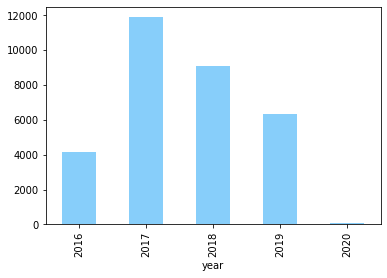

In [39]:
# plot the number of posts per year
df.groupby('year').title.count().plot(kind= 'bar', color = 'lightskyblue')

# Count Vectorizer

In [33]:
# instantiate CountVectorizer.
cvec = CountVectorizer(stop_words = 'english', min_df=3, ngram_range=(1, 1))

In [34]:
# fit countvec on title column
cvec.fit(df['title'])

CountVectorizer(min_df=3, stop_words='english')

In [35]:
# Transform the features
feature_transform = cvec.transform(df['title'])

In [36]:
# Create a dataframe with the transformed feature data
feature_transform_df = pd.DataFrame(feature_transform.todense(), 
                          columns=cvec.get_feature_names())


In [37]:
# Look at the top occuring words
feature_transform_df.sum().sort_values(ascending = False).head(50)

trump         3218
conspiracy    2049
people        1851
just          1715
clinton       1247
new           1116
like          1020
hillary       1018
media          928
news           872
reddit         840
world          837
11             809
government     793
video          776
don            759
think          758
right          754
fbi            739
time           727
did            724
sub            714
russia         703
cia            692
post           684
know           680
years          670
says           665
going          665
pizzagate      646
real           634
does           629
earth          623
white          617
year           602
evidence       582
president      570
child          567
fake           564
believe        564
war            561
epstein        548
israel         532
000            528
state          526
wikileaks      524
anti           524
obama          519
shooting       516
russian        498
dtype: int64

<AxesSubplot:>

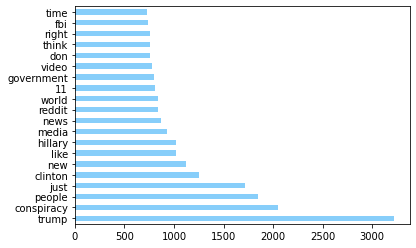

In [38]:
# Plot top occuring words
feature_transform_df.sum().sort_values(ascending = False).head(20).plot(kind= 'barh', color = 'lightskyblue')